In [1]:
# Import the necessary libraries
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

In [2]:
# Load the data from separate files
btc_data = pd.read_csv('BTC.csv', parse_dates=True, index_col='date')
eth_data = pd.read_csv('ETH.csv', parse_dates=True, index_col='date')

In [3]:
# Sync start dates: start from the later of the two start dates
start_date = max(btc_data.index.min(), eth_data.index.min())
btc_data = btc_data[btc_data.index >= start_date]
eth_data = eth_data[eth_data.index >= start_date]

In [4]:
# Ensure both dataframes are aligned by date
data = pd.concat([btc_data['close'].rename('BTC'), eth_data['close'].rename('ETH')], axis=1)

In [5]:
# Display initial data to understand its structure
print(data.head())

               BTC   ETH
date                    
2015-08-07  277.89  3.00
2015-08-08  258.60  1.20
2015-08-09  263.87  1.20
2015-08-10  263.30  1.20
2015-08-11  269.03  0.99


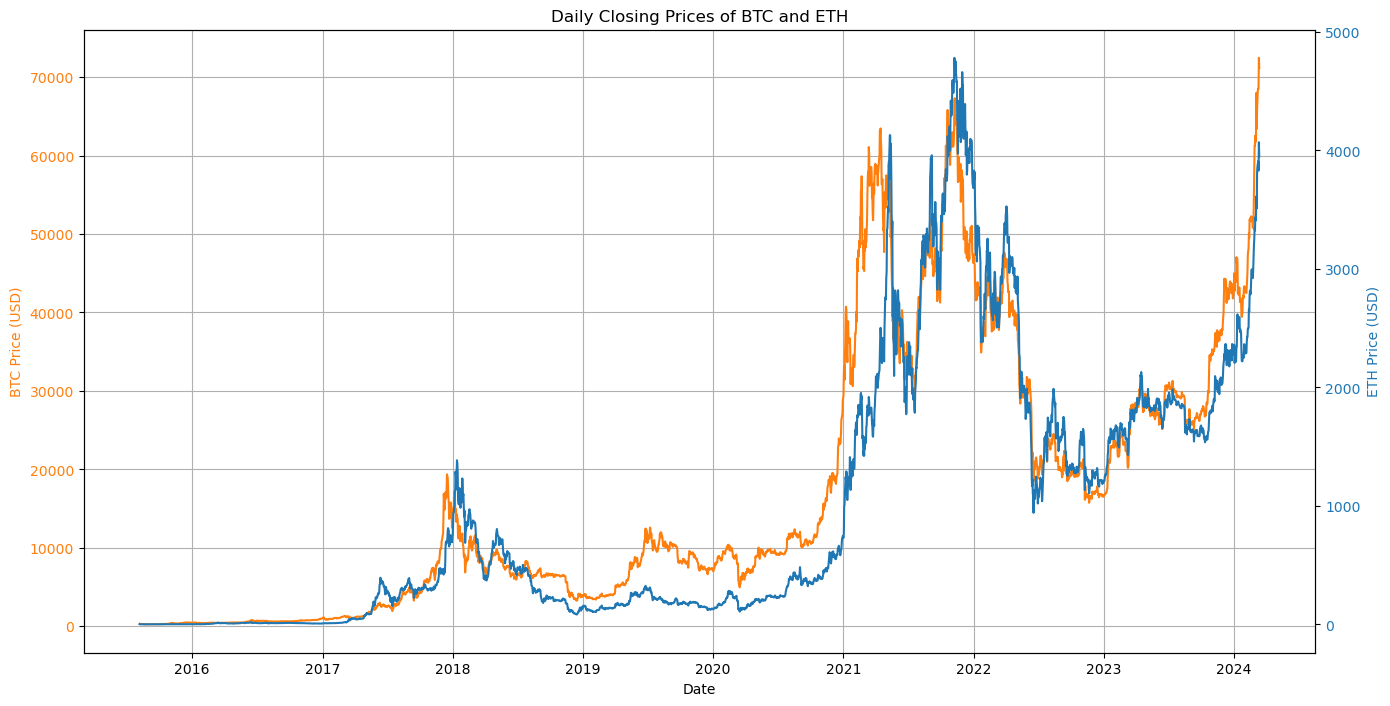

In [6]:
# Plot the initial price data with dual y-axis
fig, ax1 = plt.subplots(figsize=(14, 7))

# First axis for BTC
color = 'tab:orange'
ax1.set_xlabel('Date')
ax1.set_ylabel('BTC Price (USD)', color=color)
ax1.plot(data.index, data['BTC'], label='Bitcoin (BTC)', color=color)
ax1.tick_params(axis='y', labelcolor=color)

# Create a second y-axis for ETH
ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
color = 'tab:blue'
ax2.set_ylabel('ETH Price (USD)', color=color)  # we already handled the x-label with ax1
ax2.plot(data.index, data['ETH'], label='Ethereum (ETH)', color=color)
ax2.tick_params(axis='y', labelcolor=color)

# Title and grid
fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.title('Daily Closing Prices of BTC and ETH')
ax1.grid(True)

# Show the plot
plt.show()


In [7]:
# Initial Correlation Analysis
correlation = data.corr()
print("Initial Correlation Matrix:\n", correlation)

Initial Correlation Matrix:
           BTC       ETH
BTC  1.000000  0.943895
ETH  0.943895  1.000000


In [8]:
# Standardize the data
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)

In [9]:
# Apply PCA
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(data_scaled)

In [10]:
# Percentage of variance explained by each of the selected components
explained_variance = pca.explained_variance_ratio_
print("Explained Variance by Component: ", explained_variance)

Explained Variance by Component:  [0.97194744 0.02805256]


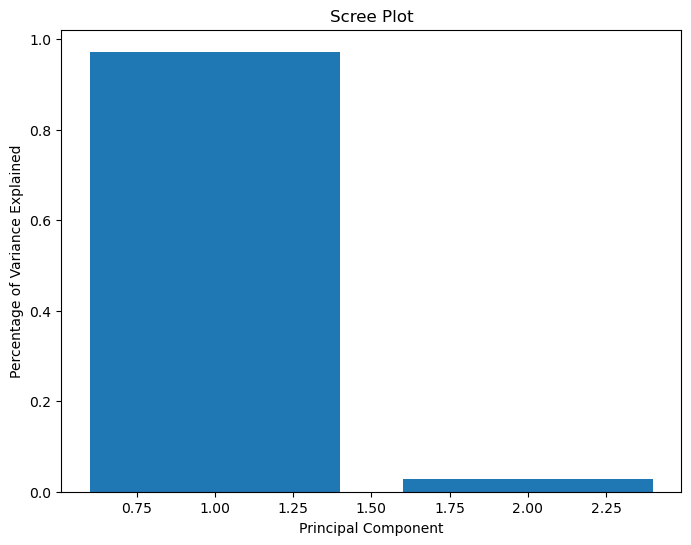

In [11]:
# Scree plot
plt.figure(figsize=(8, 6))
plt.bar(range(1, len(pca.explained_variance_ratio_) + 1), pca.explained_variance_ratio_)
plt.ylabel('Percentage of Variance Explained')
plt.xlabel('Principal Component')
plt.title('Scree Plot')
plt.show()

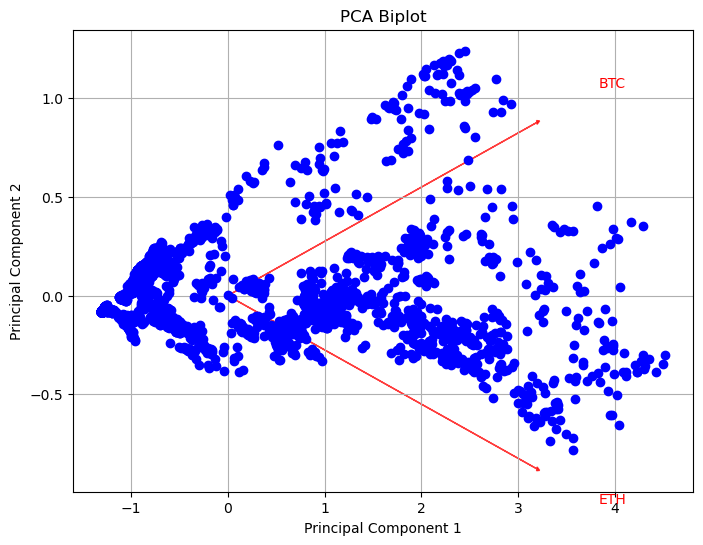

In [12]:
# Biplot
plt.figure(figsize=(8, 6))
xvector = pca.components_[0] # Component 1
yvector = pca.components_[1] # Component 2
xs = principalComponents[:,0] # scores for Component 1
ys = principalComponents[:,1] # scores for Component 2

## points
for i in range(len(xs)):
    plt.plot(xs[i], ys[i], 'bo') # blue dots
    
## vectors
for i in range(len(xvector)):
    # arrows project features as vectors.
    plt.arrow(0, 0, xvector[i]*max(xs), yvector[i]*max(ys),
              color='r', width=0.0005, head_width=0.02, alpha=0.75)
    plt.text(xvector[i]*max(xs)*1.2, yvector[i]*max(ys)*1.2,
             list(data.columns.values)[i], color='r')

plt.title('PCA Biplot')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.grid(True)
plt.show()
